In [201]:
# importar arquivo como csv

import pandas as pd

combined_csv = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\combined_csv.csv", index_col=None, header=0)

print(combined_csv.shape)

(1499999, 8)


C:\Users\Marcelo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
combined_csv.head()

,encrypted_domain,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj
0,6139646137356433363237396637323937336161383832...,21404ebaa0106ca20ae283c89271,3630643234373336643037313439636562303565393630...,2018-11-19T16:40:45.000Z,100.005,gasolina comum,NaN,NaN
1,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3261383131366661633864353433656333303337646536...,2018-12-07T09:56:37.000Z,50.0008,filtro pel 107 tec fil,NaN,NaN
2,6139646137356433363237396637323937336161383832...,21404ebaa0106ca20ae283c89271,6364633832333939393439623930373034393366626462...,2018-10-18T08:29:47.000Z,10.0514,gasolina comum,NaN,NaN
3,6139646137356433363237396637323937336161383832...,8ef4d40b852168ea8e3bbc4c89a0,3231383536386136336562643333306531303434343463...,2018-10-15T09:18:55.000Z,180.004,gasolina comum,NaN,NaN
4,6139646137356433363237396637323937336161383832...,8ef4d40b852168ea8e3bbc4c89a0,3864633636396239353161643761343839323436653162...,2018-10-07T00:41:16.000Z,19.9623,gasolina comum,NaN,NaN


In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import pylab as pl
from mpl_toolkits import mplot3d

In [188]:
stores = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\stores_details.csv",index_col=None, header=0)

In [189]:
stores.drop("encrypted_cnpj", inplace=True, axis=1)
stores.drop("cnae_code", inplace=True, axis=1)
stores.drop("encrypted_5_zipcode", inplace=True, axis=1)
stores.drop("encrypted_domain", inplace=True, axis=1)
stores.drop("cnae_desc", inplace=True, axis=1)
stores = stores.fillna(0)
stores = stores.round(1)
#stores['cnae_code'] = stores['cnae_code'].round(0)
#stores['cnae_code'] = stores.cnae_code.astype(int)
stores.head()

,encrypted_cnpj_prefix,cheque,crediario,credito,debito,deposito,dinheiro,transferencia
0,3137373536623834633666646166383863616135343265...,0.0,0.0,0.7,0.3,0.0,0.0,0.0
1,6466343534303232623763306237306634636139656335...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3262633161333664643064653561333031653037333135...,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3834663261623030366630393237646232303061663134...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6233646339626133346562303833363737343531396131...,0.1,0.0,0.2,0.8,0.0,0.0,0.0


In [190]:
stores['encrypted_cnpj_prefix'].nunique()

1299

In [127]:
test = stores.head(488)
train = stores.tail(1140)

In [128]:
X = np.array(train.drop(['cnae_code'], 1).astype(float))

In [129]:
y = np.array(train['cnae_code'])

In [191]:
features = ['cheque', 'crediario', 'credito', 'debito', 'deposito', 'dinheiro', 'transferencia']

# Separating out the features
x = stores.loc[:, features].values
# Separating out the target
y = stores.loc[:, ['encrypted_cnpj_prefix']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [195]:
pca = PCA(n_components=3).fit(x)
pca_2d = pca.transform(x)
pca_2d

array([[ 1.8250945 , -0.11816087, -0.20869207],
       [ 2.00071312, -0.1647367 , -0.28006409],
       [-1.88018719, -1.43189839, -0.37572723],
       ...,
       [-0.59562396,  0.18105813,  0.02018479],
       [ 0.06026297, -0.79831754, -0.32789566],
       [-0.31644982, -0.73268751, -0.25028942]])

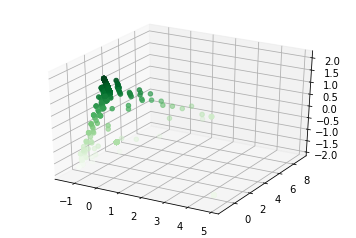

In [200]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = pca_2d[:,0]
xdata = pca_2d[:,1]
ydata = pca_2d[:,2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [138]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [142]:
finalDf = pd.concat([principalDf, stores[['cnae_code']]], axis = 1)

In [144]:
finalDf.head()

,principal component 1,principal component 2,cnae_code
0,1.825094,-0.118161,4731800
1,2.000713,-0.164737,4731800
2,-1.880187,-1.431898,5611203
3,2.000713,-0.164737,4731800
4,1.488012,0.064618,4731800


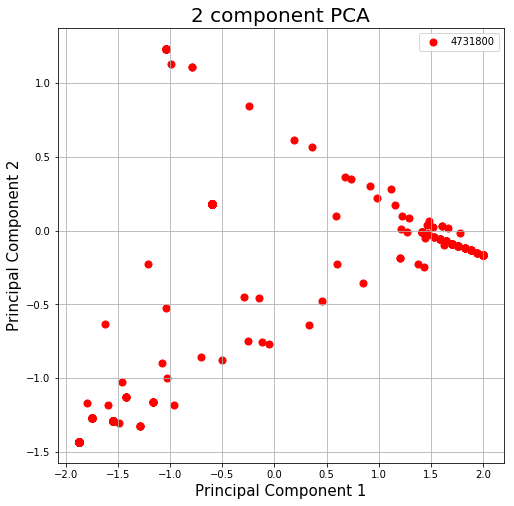

In [145]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [4731800]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cnae_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

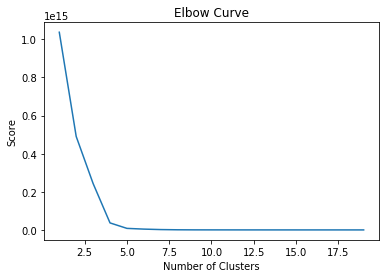

In [163]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(train).inertia_ for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [164]:
kmeans= KMeans(n_clusters=3,init='k-means++', random_state=0)
y=kmeans.fit_predict(train)

In [158]:
plt.scatter(finalDf[y == 0,0], finalDf[y==0,1], s=25, c='red', label='Cluster 1')
plt.scatter(finalDf[y == 1,0], finalDf[y==1,1], s=25, c='blue', label='Cluster 2')
plt.scatter(finalDf[y == 2,0], finalDf[y==2,1], s=25, c='magenta', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='yellow', label='Centroid')
plt.title('KMeans Clustering')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.legend()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

In [11]:
grouped = combined_csv.groupby('encrypted_saleid').count()

In [12]:
grouped.head()

,encrypted_domain,encrypted_cnpj,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj
encrypted_saleid,,,,,,,
sendo muito utilizado na culinária. Já o Gorgonzola Serrabella Gold é caracterizado por uma massa com cremosidade deliciosamente acentuada e sabor mais suave,2,2,2,2,2,0,0
3030303031313230356335656261303630613336363833656664633939356133,1,1,1,1,1,1,0
3030303032623039666235383630613135663139336531633735653233373536,1,1,1,1,1,0,0
3030303033353036306363623539316162373334613136376237616661356135,1,1,1,1,1,0,0
3030303033616130623636366463326634356334653435376538366361393364,1,1,1,1,1,0,0
